## students performance analysis 

## Import necessary modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score,average_precision_score
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.metrics import plot_precision_recall_curve, roc_curve, roc_auc_score

## Load Data

In [2]:
df = pd.read_csv('pre_process_students_performance.csv')

## Explore Data

In [3]:
df.head()

,gender,level_of_education,lunch,math_score,reading_score,writing_score,average,performance
0,0,0,0,72,72,74,72.67,0
1,0,0,0,69,90,88,82.33,0
2,0,1,0,90,95,93,92.67,0
3,1,1,1,47,57,44,49.33,1
4,1,0,0,76,78,75,76.33,0


In [4]:
print('Total no. of samples of Sample data =', df.shape[0])
print('Total no. of features of Sample data =', df.shape[1])

Total no. of samples of Sample data = 1000
Total no. of features of Sample data = 8


In [5]:
print('Total no.of elements in sample data = ', df.size)

Total no.of elements in sample data =  8000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              1000 non-null   int64  
 1   level_of_education  1000 non-null   int64  
 2   lunch               1000 non-null   int64  
 3   math_score          1000 non-null   int64  
 4   reading_score       1000 non-null   int64  
 5   writing_score       1000 non-null   int64  
 6   average             1000 non-null   float64
 7   performance         1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [7]:
df.describe(include='all')

,gender,level_of_education,lunch,math_score,reading_score,writing_score,average,performance
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.48,0.46,0.35,66.09,69.17,68.05,67.77,0.29
std,0.50,0.50,0.48,15.16,14.60,15.20,14.26,0.45
min,0.00,0.00,0.00,0.00,17.00,10.00,9.00,0.00
25%,0.00,0.00,0.00,57.00,59.00,57.75,58.33,0.00
50%,0.00,0.00,0.00,66.00,70.00,69.00,68.33,0.00
75%,1.00,1.00,1.00,77.00,79.00,79.00,77.67,1.00
max,1.00,1.00,1.00,100.00,100.00,100.00,100.00,1.00


###  DATA VISUALIZATION

In [8]:
categorical_variables = []
numerical_variables = []
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_variables.append(feature)
    else:
        numerical_variables.append(feature)

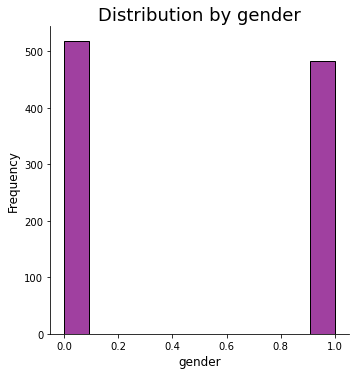

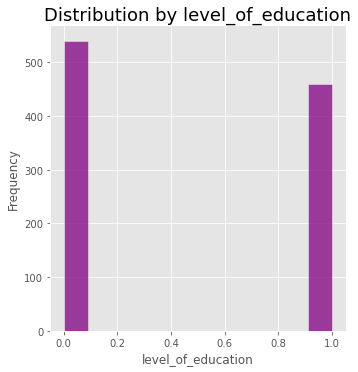

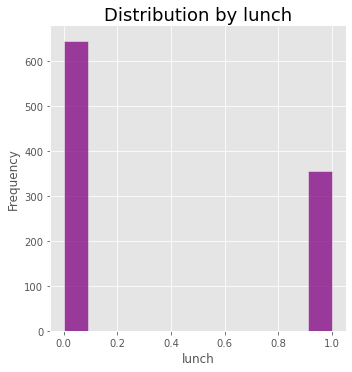

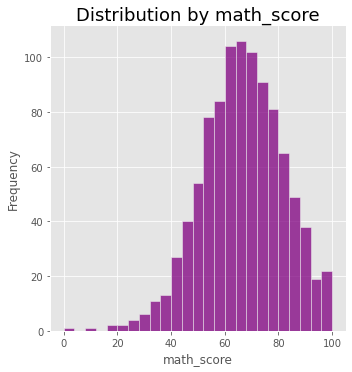

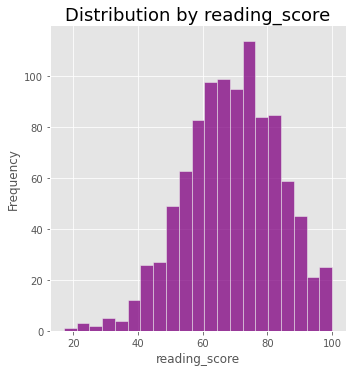

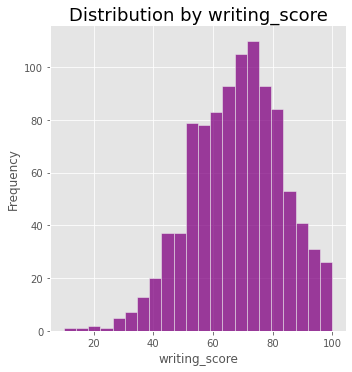

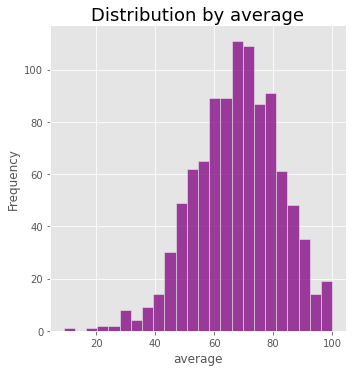

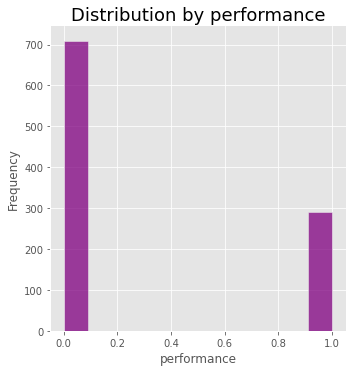

In [9]:
for feature in numerical_variables:
    sns.displot(x = feature, data = df, color = 'purple', kde = False)
    plt.style.use('ggplot')
    plt.title('Distribution by' + ' ' + feature, size = 18)
    plt.xlabel(feature, size = 12)
    plt.ylabel('Frequency', size = 12)

In [10]:
df['performance'].unique()

array([0, 1], dtype=int64)

# 1. Logistic Regression Model

In [11]:
X1 = df.drop(['performance'], axis = 1)
y1 = df['performance']

X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size=0.25, random_state=42)

lor = LogisticRegression(penalty='l2', C=10.0)
lor.fit(X1_train, y1_train)
y1_pred = lor.predict(X1_test)

# 2. Random Forest Classifier Model 

In [12]:
X2 = df.drop(['performance'], axis = 1)
y2 = df['performance']
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X2_train, y2_train)
y2_pred = rfc.predict(X2_test)

# 3. KNeighbors Classifier Model

In [13]:
X3 = df.drop(['performance'], axis = 1)
y3 = df['performance']
X3_train, X3_test, y3_train, y3_test = train_test_split (X3, y3, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X3_train, y3_train)
y3_pred = knn.predict(X3_test)


# 4. Decision Tree Classifier Model

In [14]:
X4 = df.drop(['performance'], axis = 1)
y4 = df['performance']

X4_train, X4_test, y4_train, y4_test = train_test_split (X4, y4, test_size=0.25, random_state=42, stratify=y4)

dtc = DecisionTreeClassifier()
dtc.fit(X4_train, y4_train)
y4_pred = dtc.predict(X4_test)

# Model Evaluation

In [15]:
X = df.drop(['performance'], axis = 1)
y = df['performance']

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.25, random_state=42, stratify=y)

classifiers = { 
    "LOR": LogisticRegression(),
    "DTC": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

no_classifiers = len(classifiers.keys())

def classify(X_train, y_train, X_test, y_test, verbose = True):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 8)), 
                              columns = ['Classifier',
                                         'F2 Score',
                                         'Accuracy',
                                         'Precision',
                                         'Recall',
                                         'Avg Precision',
                                         'ROC',
                                         'Training time'])
    
    count = 0
    for key, classifier in classifiers.items():
        
        t_start = process_time()  
        classifier.fit(X_train, y_train)
        
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        
        y_pred = classifier.predict(X_test)
        
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'F2 Score'] = fbeta_score(y_test, y_pred, average='weighted', beta=2.0)
        df_results.loc[count,'Accuracy'] = accuracy_score(y_test, y_pred)
        df_results.loc[count,'Precision'] = precision_score(y_test, y_pred)
        df_results.loc[count,'Recall'] = recall_score(y_test, y_pred)
        df_results.loc[count,'Avg Precision'] = average_precision_score(y_test, y_pred)
        df_results.loc[count,'ROC'] = roc_auc_score(y_test, y_pred)
        df_results.loc[count,'Training time'] = t_elapsed
        
        count+=1

    return df_results

In [16]:
df_results = classify(X_train, y_train, X_test, y_test)
df_results.sort_values(by='F2 Score', ascending=False)

,Classifier,F2 Score,Accuracy,Precision,Recall,Avg Precision,ROC,Training time
2,RFC,0.97,0.97,0.97,0.93,0.92,0.96,0.30
3,KNN,0.97,0.97,0.96,0.93,0.91,0.96,0.02
0,LOR,0.97,0.97,0.97,0.92,0.92,0.95,0.20
1,DTC,0.94,0.94,0.91,0.88,0.84,0.92,0.02


## Plotting AUC-PR curve

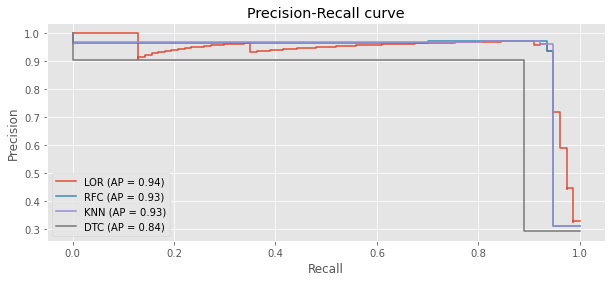

In [17]:
# Plot precision-recall curves
plt.figure(figsize=(10,4))

plot_precision_recall_curve(lor, X1_test, y1_test, ax = plt.gca(), name = "LOR")
plot_precision_recall_curve(rfc, X2_test, y2_test, ax = plt.gca(), name = "RFC")
plot_precision_recall_curve(knn, X3_test, y3_test, ax = plt.gca(), name = "KNN")
plot_precision_recall_curve(dtc, X4_test, y4_test, ax = plt.gca(), name = "DTC")

plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## Plotting ROC curve

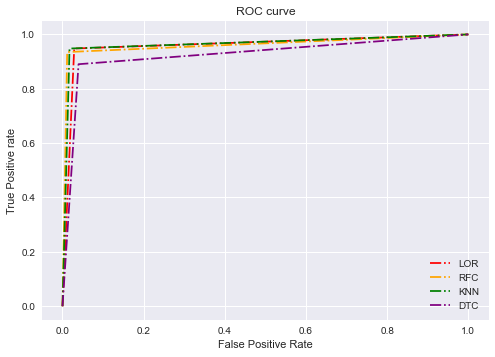

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr1, tpr1, thresh1 = roc_curve(y1_test, y1_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y2_test, y2_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y3_test, y3_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y4_test, y4_pred, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-.',color='red', label='LOR')
plt.plot(fpr2, tpr2, linestyle='-.',color='orange', label='RFC')
plt.plot(fpr3, tpr3, linestyle='-.',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='-.',color='purple', label='DTC')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

### The best Model to be selected is Random forest classifier

In [19]:
X2 = df.drop(['performance'], axis = 1)
y2 = df['performance']


In [20]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10 )
rfc.fit(X2_train, y2_train)
y2_pred = rfc.predict(X2_test)

X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape
#y2_pred.shape

((800, 7), (200, 7), (800,), (200,))

In [21]:
A = accuracy_score(y2_test,y2_pred)
A

0.98

In [22]:
accuracy_score = round(accuracy_score(y2_test, y2_pred), 2)
precision_score = round(precision_score(y2_test, y2_pred), 2)
recall_score = round(recall_score(y2_test, y2_pred), 2)
f2_score = round(fbeta_score(y2_test, y2_pred, average='weighted', beta=2.0), 2)
average_precision_score = round(average_precision_score(y2_test, y2_pred), 2)
roc_auc_score = round(roc_auc_score(y2_test, y2_pred), 2)

print("Metrics for RFC Model:")
print("Accuracy = ", accuracy_score)
print("Precision = ", precision_score)
print("Recall = ", recall_score)
print("F2 Score =", f2_score)
print("Avg Precision score = ", average_precision_score)
print("ROC score = ", roc_auc_score)

Metrics for RFC Model:
Accuracy =  0.98
Precision =  0.98
Recall =  0.95
F2 Score = 0.98
Avg Precision score =  0.95
ROC score =  0.97
